# 아이폰 가격 통계

### 필요한 라이브러리 로드

In [1]:
# 라이브러리 로드
from selenium import webdriver
from bs4 import BeautifulSoup
import time

### 네이버 쇼핑 상세검색 이용

In [2]:
# 검색어와 제외 검색어 리스트
search_name_list = ["아이폰_12_미니_64GB", "아이폰_12_미니_128GB", "아이폰_12_미니_256GB", "아이폰_12_64GB", "아이폰_12_128GB", "아이폰_12_256GB", "아이폰_12_pro_128GB", "아이폰_12_pro_256GB", "아이폰_12_pro_512GB", "아이폰_12_pro_max_128GB", "아이폰_12_pro_max_256GB", "아이폰_12_pro_max_512GB"]
search_except_name_list = ["128GB, 256GB, pro, max","64GB, 256GB, pro, max", "64GB, 128GB, pro, max", "128GB, 256GB, 미니, pro", "64GB, 256GB, 미니, pro", "64GB, 128GB, 미니, pro", "256GB, 512GB, 미니, max", "128GB, 512GB, 미니, max", "128GB, 256GB, 미니, max", "256GB, 512GB, 미니", "128GB, 512GB, 미니","128GB, 256GB, 미니"]
# 검색어 개수와 제외 검색어 개수 확인
num = len(search_name_list)
print(len(search_name_list))
print(len(search_except_name_list))

12
12


### 아이폰 모델, 용량 별 가격 모아 파일로 출력하기

In [3]:
# 평균, 최고, 최소값 행 표시
price_index = ["평균가", "최고가", "최소가", "자료 개수"]
# 모든 상품 가격 리스트
all_price = []
# 모든 상품 가격과 행 정보 리스트
all_info = []

# 상품 별 가격 리스트화 하기
driver = webdriver.Chrome('chromedriver')
time.sleep(1)

for i in range(num):
    # webdriver 불러오기, '네이버 쇼핑' 접속
    url = "https://shopping.naver.com/home/p/index.naver"
    driver.get(url)
    time.sleep(2)
    
    # 네이버 쇼핑에 search_name_list의 요소들 하나씩 검색
    # 상세 검색으로 필요없는 단어 설정해서 검색하기 과정
    search_name = search_name_list[i]
    search_except_name = search_except_name_list[i]
    
    # 상세 검색 여는 버튼 xpath = '//*[@id="_detailSearchButton"]'
    # 상세 검색의 기본검색 창 xpath = '//*[@id="lb_srh_basis"]'
    # 제외하는 단어 검색창 xpath= '//*[@id="lb_srh_exclude"]'
    # 상세 검색 버튼 xpath = '//*[@id="_detailSearchDiv"]/div/div[2]/a[3]'
    # 정확히 검색창 xpath = '//*[@id="lb_srh_exact"]'
    to_detail_search_button = driver.find_element_by_xpath('//*[@id="_detailSearchButton"]')
    detail_search_basic_search = driver.find_element_by_xpath('//*[@id="lb_srh_basis"]')
    except_word = driver.find_element_by_xpath('//*[@id="lb_srh_exclude"]')
    detail_search_button = driver.find_element_by_xpath('//*[@id="_detailSearchDiv"]/div/div[2]/a[3]')
    exact_search = driver.find_element_by_xpath('//*[@id="lb_srh_exact"]')
    
    # 상세 검색창 클릭
    to_detail_search_button.click()
    time.sleep(1)
    # 상세 검색창에 검색어 입력
    detail_search_basic_search.send_keys(search_name)
    time.sleep(0.5)
    exact_search.send_keys(search_name)
    time.sleep(0.5)
    
    # 상세 검색창에 제외 단어 입력하기
    except_word.send_keys(search_except_name)
    time.sleep(0.5)
    detail_search_button.click()
    time.sleep(2)
    
    # 페이지 스크롤 맨밑까지 내리기
    # 스크롤 높이 가져옴
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # 끝까지 스크롤 다운
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)

        # 스크롤 다운 후 스크롤 높이 다시 가져옴
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    
    # 상품의 가격 수집(BS)
    page = driver.page_source
    soup = BeautifulSoup(page, 'lxml')
    
    # 전체 상품 리스트 담기 태그 : 'ul', class_='list_basis'
    all_mer_list = soup.find('ul', class_='list_basis')
    
    # 가격표시 강조 부분 태그 : 'strong', class_='basicList_price__2r23_'
    basiclist_price = all_mer_list.find_all('strong', class_='basicList_price__2r23_')
    
    # 상품별 가격 모으기
    price_list = []
    for one in basiclist_price:
        tmp = one.find('span', class_='price_num__2WUXn').text
        price_list.append(tmp)
        
    # 가격을 숫자 형태로 변환
    int_price_list = []
    for i in list(price_list):
        tmp = i.replace("원", "")
        tmp = tmp.replace(",","")
        tmp = int(tmp)
        int_price_list.append(tmp)
        
    # 극단값 제거
    mod_price_list = []
    for i in int_price_list:
        if i >= 500000 and i <= 2000000:
            mod_price_list.append(i)
        
    # 평균, 최고, 최저가 출력
    mean = int(sum(mod_price_list) / len(mod_price_list)) # 정수값으로 출력
    maxium = max(mod_price_list)
    minium = min(mod_price_list)
    num_mod_price_list = len(mod_price_list) # 크롤링한 자료 개수
    # 확인
    print(f'{search_name}의 평균가격 :', mean,'원')
    print(f'{search_name}의 최고가격 :', maxium,'원')
    print(f'{search_name}의 최저가격 :', minium,'원')
    print(f"총 {num_mod_price_list}개")
    
    # 평균, 최고, 최저가 순서대로 리스트로 만들기
    mod_price = []
    mod_price.append(mean)
    mod_price.append(maxium)
    mod_price.append(minium)
    mod_price.append(num_mod_price_list)
       
    # 여러 상품의 가격을 하나로 모아 리스트 만들기
    all_price.append(mod_price)
    time.sleep(2)
    
# 여러 상품의 가격과 행 정보를 모아 파일로 만들기
import pandas as pd
# 딕셔너리 만들기
dict_dat = {}
dict_dat["정보"] = price_index
# 딕셔너리에 원소 추가하기
for i in range(num):
    dict_dat[search_name_list[i]] = all_price[i]
# 딕셔너리로 파일 만들기
dat = pd.DataFrame(dict_dat)
dat.to_csv("아이폰_모델별_가격.csv", index=False, encoding='utf-8-sig')
dat.to_excel("아이폰_모델별_가격.xlsx", index=False, encoding='utf-8-sig')

아이폰_12_미니_64GB의 평균가격 : 872611 원
아이폰_12_미니_64GB의 최고가격 : 1500000 원
아이폰_12_미니_64GB의 최저가격 : 582000 원
총 37개
아이폰_12_미니_128GB의 평균가격 : 1093860 원
아이폰_12_미니_128GB의 최고가격 : 1500000 원
아이폰_12_미니_128GB의 최저가격 : 529000 원
총 37개
아이폰_12_미니_256GB의 평균가격 : 1273112 원
아이폰_12_미니_256GB의 최고가격 : 1910000 원
아이폰_12_미니_256GB의 최저가격 : 555000 원
총 38개
아이폰_12_64GB의 평균가격 : 1108489 원
아이폰_12_64GB의 최고가격 : 1363200 원
아이폰_12_64GB의 최저가격 : 552490 원
총 39개
아이폰_12_128GB의 평균가격 : 1254901 원
아이폰_12_128GB의 최고가격 : 1600000 원
아이폰_12_128GB의 최저가격 : 599710 원
총 38개
아이폰_12_256GB의 평균가격 : 1426295 원
아이폰_12_256GB의 최고가격 : 1950000 원
아이폰_12_256GB의 최저가격 : 799900 원
총 39개
아이폰_12_pro_128GB의 평균가격 : 1257072 원
아이폰_12_pro_128GB의 최고가격 : 1490000 원
아이폰_12_pro_128GB의 최저가격 : 571300 원
총 38개
아이폰_12_pro_256GB의 평균가격 : 1449726 원
아이폰_12_pro_256GB의 최고가격 : 1758930 원
아이폰_12_pro_256GB의 최저가격 : 894400 원
총 38개
아이폰_12_pro_512GB의 평균가격 : 1832115 원
아이폰_12_pro_512GB의 최고가격 : 1990000 원
아이폰_12_pro_512GB의 최저가격 : 1548350 원
총 39개
아이폰_12_pro_max_128GB의 평균가격 : 1100337 원
아이폰_12_pro_max_128GB의 

### csv 파일을 읽어 막대그래프 만들기

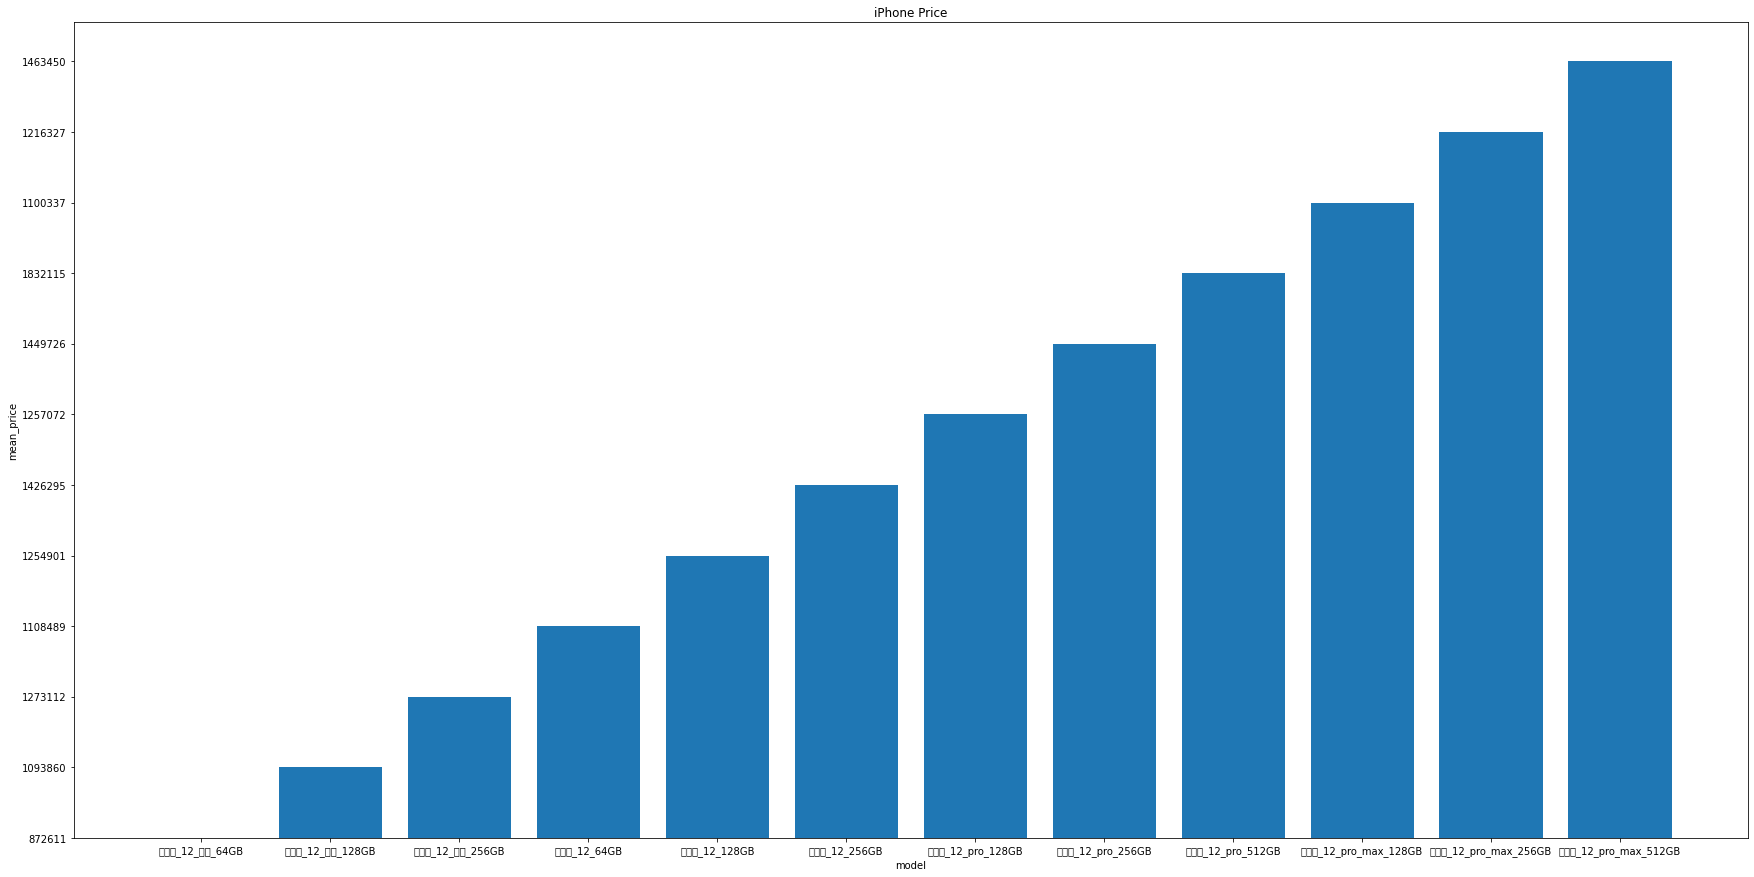

In [5]:
# 라이브러리 로드
import csv

# 각 행을 리스트로 만들기
index = []
f = open('아이폰_모델별_가격.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    index.append(line)
f.close()
# 첫번째 원소 제거
x_mer = index[0]
del x_mer[0]
x_price = index[1]
del x_price[0]

# 모델, 용량별 가격 막대그래프로 표현하기
import matplotlib.pyplot as plt
import numpy as np

# x축 범위
x = np.arange(len(x_mer))

# 그래프 타이틀, x축 라벨, y축 라벨
plt.title('iPhone Price')
plt.xlabel('model')
plt.ylabel('mean_price')

# 그래프 x축 값
plt.bar(x, x_price)
# 그래프 y축 값
plt.xticks(x, x_mer)
# 그래프 사이즈(가로, 세로)
plt.rcParams['figure.figsize'] = [30, 15]

plt.show()

#### 한글 폰트 깨짐 오류 해결중